In [3]:
import numpy as np
 
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
 
from nltk.corpus import stopwords
stopwords = stopwords.words('spanish')
 
import matplotlib.pyplot as plt
import PIL.Image
from IPython.display import display

In [4]:
import pandas as pd
data = pd.read_csv('hween_clean.csv')
data.head()

,texto,fecha,ciudad,departamento,lat,lon
0,¿Desparchado porque mañana no podrás salir a p...,2020-10-31 00:16:27,Bogotá,Cundinamarca,4.649178,-74.062827
1,Participa en nuestro concurso de disfraces y l...,2020-10-31 00:15:34,Bogotá,Cundinamarca,4.649178,-74.062827
2,MEGA-ESPECIAL Halloween 🎃 (Parte 53). Yo veo u...,2020-10-31 00:13:59,Bogotá,Cundinamarca,4.649178,-74.062827
3,Un mensaje especial para los padres de familia...,2020-10-31 00:11:46,Bogotá,Cundinamarca,4.649178,-74.062827
4,Luna azul con halloween 🤪👻🤔,2020-10-31 00:10:04,Bogotá,Cundinamarca,4.649178,-74.062827


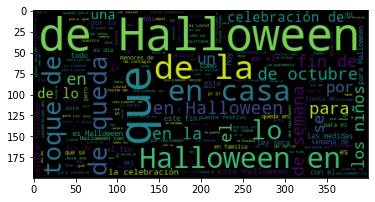

In [9]:
palabras = data.texto.str.cat(sep=" ")
wordcloud = WordCloud().generate(palabras)
 
plt.imshow(wordcloud)
plt.show()

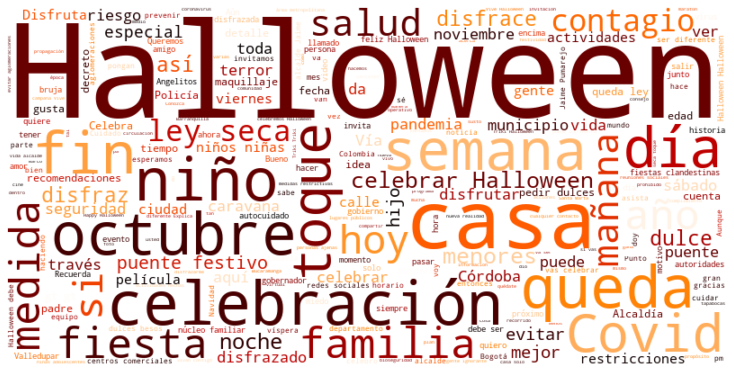

In [11]:
# Más en https://www.datacamp.com/community/tutorials/wordcloud-python
palabras = data.texto.str.cat(sep=' ')
 
wordcloud = WordCloud(width=800, height=400,
                     max_font_size=150, max_words=250,
                     background_color='white', colormap='gist_heat',
                     stopwords=stopwords).generate(palabras) # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
 
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

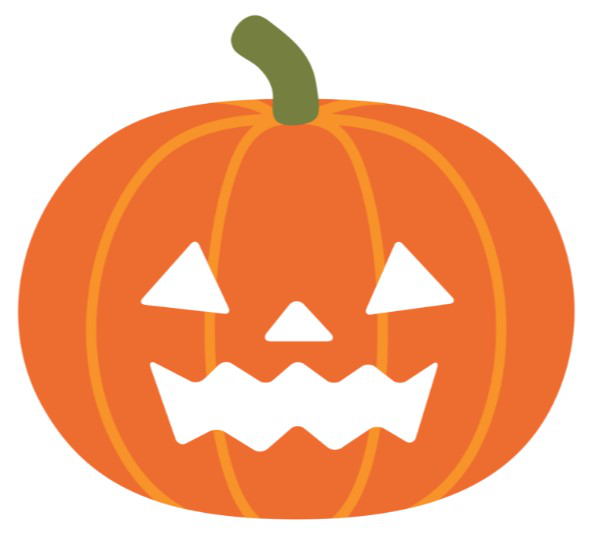

In [13]:
calabaza = PIL.Image.open("calabaza2.png")
display(calabaza)

In [14]:
mask = np.array(calabaza)
mask

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

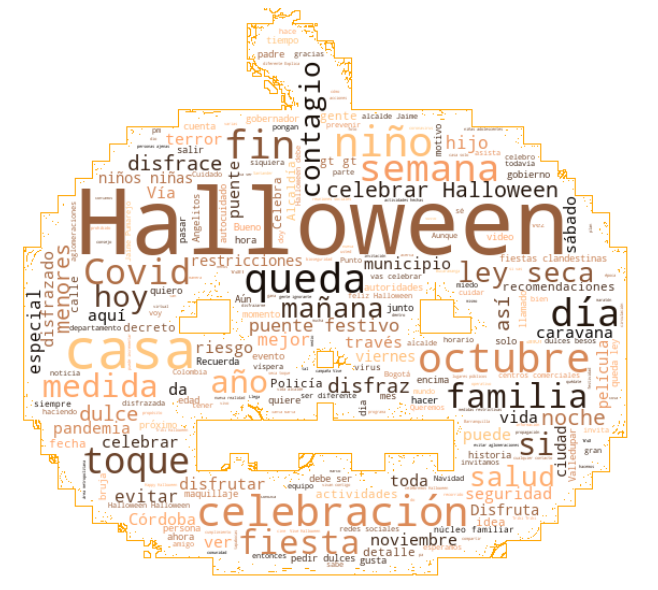

In [17]:
# Más en https://www.datacamp.com/community/tutorials/wordcloud-python
palabras = data.texto.str.cat(sep=' ')
 
wordcloud = WordCloud(width=800, height=400,
                     max_font_size=150, max_words=250,
                     background_color='white', colormap='copper_r',
                     stopwords=stopwords,
                     mask=mask, contour_width=0.5, contour_color='orange').generate(palabras) # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
 
wordcloud.to_file("calabaza.png")
 
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)

In [21]:
# nube de palabras & mapa de árbol
ciudad1 = 'Barranquilla'
ciudad2 = 'Medellín'
 
data1 = data[data.ciudad==ciudad1]
data2 = data[data.ciudad==ciudad2]
 
palabras1 = data1.texto.str.cat(sep=" ")
palabras2 = data2.texto.str.cat(sep=" ")
 
wordcloud1 = WordCloud(stopwords = stopwords).generate(palabras1).words_
wordcloud2 = WordCloud(stopwords = stopwords).generate(palabras2).words_
 
temp1 = pd.DataFrame.from_dict(wordcloud1, orient='index').reset_index()
temp1.columns = ['palabra', 'cnt']
temp1['ciudad'] = ciudad1
 
temp2 = pd.DataFrame.from_dict(wordcloud2, orient='index').reset_index()
temp2.columns = ['palabra', 'cnt']
temp2['ciudad'] = ciudad2
 
data_nube = pd.concat([temp1, temp2])
 
data_nube.to_csv('nube.csv', index=False)

In [22]:
# mapa
data['contador_palabras'] = data.texto.apply(lambda valor: len(valor.split()))
data[['ciudad', 'lat', 'lon', 'contador_palabras']].to_csv("mapa.csv")